In [1]:
%%time
import networkx as nx
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load data set csv
df = pd.read_csv("./dataset/Social Science H.csv")
# df.set_index('NO ABSEN', inplace=True)
df

CPU times: user 1.05 s, sys: 294 ms, total: 1.34 s
Wall time: 3.22 s


,Timestamp,Email Address,NAMA LENGKAP,NO ABSEN,KELAS,1. Teman anda yang paling anda sukai di kelas,Alasan,2. Teman anda yang paling anda sukai di kelas,ALASAN,1. Teman anda yang paling anda tidak sukai di kelas,ALASAN.1,2. Teman anda yang paling anda tidak sukai di kelas,ALASAN.2
0,5/6/2023 22:35:14,gungdiahganis@gmail.com,Anak Agung Ayu Diah Ganiswari,1,VIIH,Ni Gusti Ayu Putu Intan Cahyani Dewi,"baik , dmn ngai kedek kanti sakit basang",Ni Wayan Anastasya Putri,baik,I Kadek Addi Wira Purnama,"caper , pick me",Ni Komang Erawati,"caper , sg bisa nenggil"
1,5/8/2023 20:07:49,putrasuarjaya148@gmail.com,Anak Agung Gede Putra Suarjaya,2,VIIH,I Dewa Gede Parama Aryasatya Adi Putra,karena dia asik,Anak Agung Gede Radeya Gotama,orang nya asik,I Kadek Addi Wira Purnama,Karna dia kalau Kita ejek ngak boleh kalau dia...,Ni Gusti Ayu Putu Intan Cahyani Dewi,sok asikk
2,5/8/2023 20:05:13,gungradea123@gmail.com,Anak Agung Gede Radeya Gotama,3,VIIH,Ni Gusti Ayu Putu Intan Cahyani Dewi,Karena dia asik diajak bercanda atau bermain,Anak Agung Gede Putra Suarjaya,Karena dia polos dan polos,I Kadek Addi Wira Purnama,Karena dia sok asik dan diya sering minta toh ...,Ni Putu Dhvanie Eva Putri,Karna dia sombong dan sok akrab
3,5/17/2023 9:04:53,pgung567@gmail.com,Anak Agung Raka Mirah Putri Lestari,4,VIIH,Ni luh Anggi Pradnyani,Baik,Komang Sri Agustini Dewi,Baik hati,Anak Agung Gede Radeya Gotama,Mengejek nama ortu,Ni Putu Amilia Dewi,Karena dia sombong
4,5/8/2023 21:45:36,dewaayudwi4@gmail.com,Dewa Ayu Kadek Dwi Novita,5,VIIH,Ni Komang Erawati,Karna asik,Ni Kadek Juwita,Karena baik,Anak Agung Ayu Diah Ganiswari,Karena sinis,Anak Agung Gede Radeya Gotama,Karena suka mengejek
5,5/7/2023 7:36:55,yuxxclarasatya@gmail.com,I Dewa Ayu Satya Mahadewi,6,VIIH,Komang Sri Agustini Dewi,Karna dia baik dan selalu membantu sy dalam pe...,Ni luh Anggi Pradnyani,"Karna dia baik, dan bisa bikin saya selalu ket...",Ni Komang Erawati,"Karna dia selalu teriak' di kelas, dia selalu ...",Anak Agung Ayu Diah Ganiswari,Karna dia suka nyindir' saya\n
6,6/23/2023 19:37:45,nikomangsulastriasih@gmail.com,I Dewa Gede Agung Mahendra Putra,7,VIIH,I Wayan Gede Ananda Febriana,karena baik,I Putu Ananda,karena baik,Anak Agung Gede Radeya Gotama,membully nama ortu,I Kadek Addi Wira Purnama,karna dia nakal
7,5/19/2023 18:33:52,rmz163005@gmail.com,I Dewa Gede Parama Aryasatya Adi Putra,8,VIIH,I Kadek Addi Wira Purnama,Baperan(dia ngejek tapi gamau di ejek),I Dewa Gede Agung Mahendra Putra,Gak asik,I Kadek Addi Wira Purnama,"Sok asik,baperan,ga mau diejek tapi dia ngejek",I Dewa Gede Agung Mahendra Putra,"Sok asik,baperan"
8,5/8/2023 20:49:17,dewarafael104@gmail.com,I Dewa Made Rafael Raditya,9,VIIH,I Kadek Dody Saputra,Tidak sombong,Kadek Agus Suardana,Sopan,I Dewa Gede Agung Mahendra Putra,Sombong,I Kadek Addi Wira Purnama,Suka mengejek nama ortu
9,5/8/2023 19:59:39,dewabayu086@gmail.com,I Dewa Putu Bayu Hari Tubagus Biara,10,VIIH,Anak Agung Gede Radeya Gotama,Karena asik diajak bercanda,I Dewa Gede Parama Aryasatya Adi Putra,Karena asik untuk diajak bercanda,I Kadek Addi Wira Purnama,Karena dia hanya ingin kemauannya dituruti,I Kadek Nanda Wiguna,Karena dia sombong


In [2]:
%%time
# Pemeriksaan data awal

print(df.head())

           Timestamp               Email Address  \
0  5/6/2023 22:35:14     gungdiahganis@gmail.com   
1  5/8/2023 20:07:49  putrasuarjaya148@gmail.com   
2  5/8/2023 20:05:13      gungradea123@gmail.com   
3  5/17/2023 9:04:53          pgung567@gmail.com   
4  5/8/2023 21:45:36       dewaayudwi4@gmail.com   

                          NAMA LENGKAP  NO ABSEN KELAS  \
0        Anak Agung Ayu Diah Ganiswari         1  VIIH   
1       Anak Agung Gede Putra Suarjaya         2  VIIH   
2        Anak Agung Gede Radeya Gotama         3  VIIH   
3  Anak Agung Raka Mirah Putri Lestari         4  VIIH   
4            Dewa Ayu Kadek Dwi Novita         5  VIIH   

  1. Teman anda yang paling anda sukai di kelas  \
0          Ni Gusti Ayu Putu Intan Cahyani Dewi   
1        I Dewa Gede Parama Aryasatya Adi Putra   
2          Ni Gusti Ayu Putu Intan Cahyani Dewi   
3                        Ni luh Anggi Pradnyani   
4                             Ni Komang Erawati   

                               

In [3]:
%%time
# Pengecekan data yang hilang

print(df.isnull().sum())

Timestamp                                              0
Email Address                                          0
NAMA LENGKAP                                           0
NO ABSEN                                               0
KELAS                                                  0
1. Teman anda yang paling anda sukai di kelas          0
Alasan                                                 0
2. Teman anda yang paling anda sukai di kelas          0
ALASAN                                                 0
1. Teman anda yang paling anda tidak sukai di kelas    0
ALASAN.1                                               0
2. Teman anda yang paling anda tidak sukai di kelas    0
ALASAN.2                                               0
dtype: int64
CPU times: user 4.9 ms, sys: 2.04 ms, total: 6.93 ms
Wall time: 16.7 ms


In [4]:
%%time
# Penanganan data yang hilang

df['Alasan'].fillna('Tidak disebutkan', inplace=True)

CPU times: user 1.08 ms, sys: 327 µs, total: 1.41 ms
Wall time: 1.4 ms


In [5]:
%%time
# Menimpan dataframe yang telah diolah

df.to_csv('./sociometryclustering/Processed Data H.csv', index=False)

CPU times: user 8.67 ms, sys: 6.74 ms, total: 15.4 ms
Wall time: 31 ms


In [6]:
%%time
# Inisialisasi matriks

n = len(df['NAMA LENGKAP'].unique())
sosiometri_matrix = np.zeros((n, n))

CPU times: user 588 µs, sys: 171 µs, total: 759 µs
Wall time: 720 µs


In [7]:
%%time
# Membuat mapping nama ke indeks

name_to_index = {name: idx for idx, name in enumerate(df['NAMA LENGKAP'].unique())}

CPU times: user 378 µs, sys: 68 µs, total: 446 µs
Wall time: 399 µs


In [8]:
%%time
# Isi matriks berdasarkan data

for idx, row in df.iterrows():
    # Untuk teman yang disukai
    liked_names = [row['1. Teman anda yang paling anda sukai di kelas'],
                   row['2. Teman anda yang paling anda sukai di kelas']]

    for liked_name in liked_names:
        if liked_name in name_to_index:
            sosiometri_matrix[name_to_index[row['NAMA LENGKAP']]][name_to_index[liked_name]] += 1

    # Untuk teman yang tidak disukai
    disliked_names = [row['1. Teman anda yang paling anda tidak sukai di kelas'],
                      row['2. Teman anda yang paling anda tidak sukai di kelas']]

    for disliked_name in disliked_names:
        if disliked_name in name_to_index:
            sosiometri_matrix[name_to_index[row['NAMA LENGKAP']]][name_to_index[disliked_name]] -= 1


CPU times: user 21.6 ms, sys: 2.1 ms, total: 23.7 ms
Wall time: 57 ms


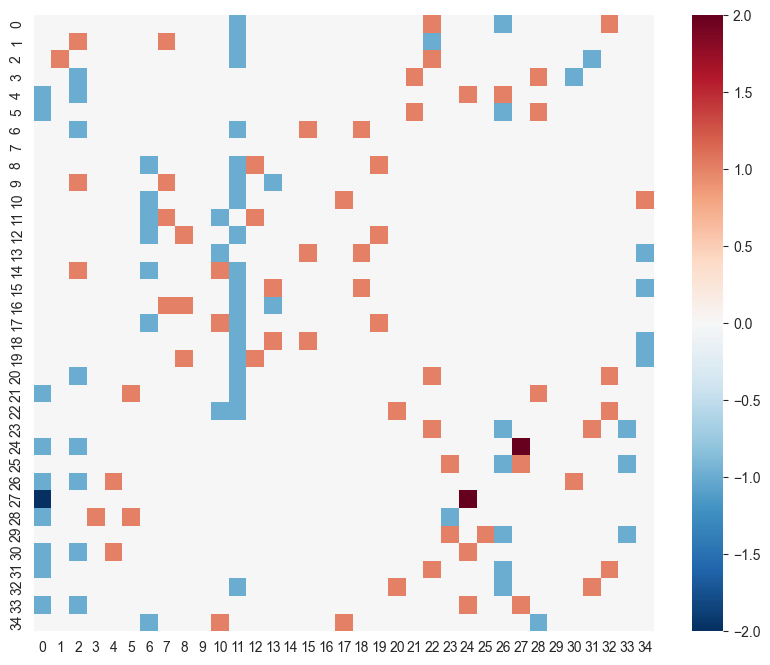

CPU times: user 4.01 s, sys: 253 ms, total: 4.26 s
Wall time: 12.7 s


In [9]:
%%time
# Visualisasi matriks

plt.figure(figsize=(10, 8))
sns.heatmap(sosiometri_matrix, cmap='RdBu_r')
plt.show()


In [10]:
%%time
# Standarisasi data

scaler = StandardScaler()
sosiometri_scaled = scaler.fit_transform(sosiometri_matrix)

CPU times: user 5.03 ms, sys: 3.13 ms, total: 8.16 ms
Wall time: 16 ms


/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super(

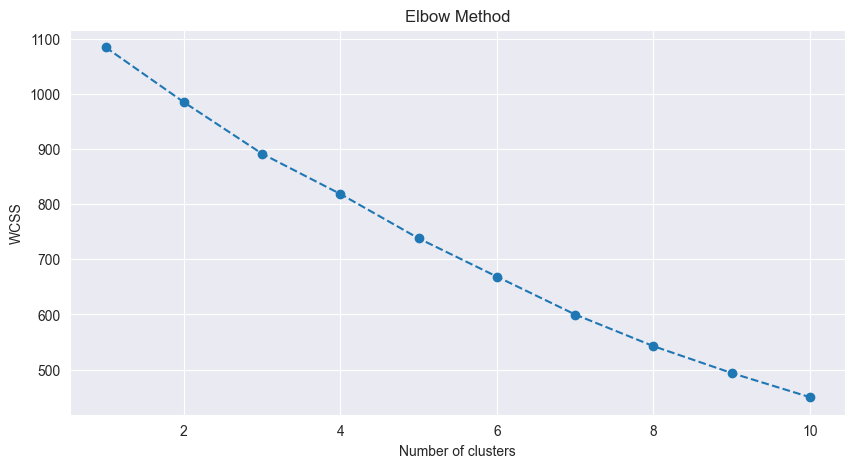

CPU times: user 3.38 s, sys: 397 ms, total: 3.78 s
Wall time: 5.31 s


In [11]:
%%time
# Menentukan jumlah klaster menggunakan metode Elbow

wcss = [] # within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(sosiometri_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
%%time
# Menerapkan K-Means Clustering

optimal_clusters = 2  # misalkan kita memilih 2 berdasarkan metode elbow

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clustered_students = kmeans.fit_predict(sosiometri_scaled)


CPU times: user 124 ms, sys: 18.8 ms, total: 143 ms
Wall time: 89.3 ms


/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
%%time


print(len(df))
print(len(clustered_students))


35
35
CPU times: user 2.55 ms, sys: 307 µs, total: 2.86 ms
Wall time: 730 µs


In [14]:
%%time

cluster_df = pd.DataFrame({'Cluster': clustered_students})

# Concatenate the new DataFrame to the original DataFrame
df = pd.concat([df, cluster_df], axis=1)

# Check the result
print(df.head())

           Timestamp               Email Address  \
0  5/6/2023 22:35:14     gungdiahganis@gmail.com   
1  5/8/2023 20:07:49  putrasuarjaya148@gmail.com   
2  5/8/2023 20:05:13      gungradea123@gmail.com   
3  5/17/2023 9:04:53          pgung567@gmail.com   
4  5/8/2023 21:45:36       dewaayudwi4@gmail.com   

                          NAMA LENGKAP  NO ABSEN KELAS  \
0        Anak Agung Ayu Diah Ganiswari         1  VIIH   
1       Anak Agung Gede Putra Suarjaya         2  VIIH   
2        Anak Agung Gede Radeya Gotama         3  VIIH   
3  Anak Agung Raka Mirah Putri Lestari         4  VIIH   
4            Dewa Ayu Kadek Dwi Novita         5  VIIH   

  1. Teman anda yang paling anda sukai di kelas  \
0          Ni Gusti Ayu Putu Intan Cahyani Dewi   
1        I Dewa Gede Parama Aryasatya Adi Putra   
2          Ni Gusti Ayu Putu Intan Cahyani Dewi   
3                        Ni luh Anggi Pradnyani   
4                             Ni Komang Erawati   

                               

In [15]:
# Drop duplicate values in the 'NAMA LENGKAP' column
df.drop_duplicates(subset='NAMA LENGKAP', keep='first', inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Check the length after dropping duplicates
print(len(df))

# Cetak baris yang dihapus
removed_data = df[df.duplicated(subset='NAMA LENGKAP', keep='first')]
print(removed_data)

# Recreate DataFrame using unique values
unique_names_df = df.drop_duplicates(subset='NAMA LENGKAP', keep='first').copy()



35
Empty DataFrame
Columns: [Timestamp, Email Address, NAMA LENGKAP, NO ABSEN, KELAS, 1. Teman anda yang paling anda sukai di kelas, Alasan, 2. Teman anda yang paling anda sukai di kelas, ALASAN, 1. Teman anda yang paling anda tidak sukai di kelas, ALASAN.1, 2. Teman anda yang paling anda tidak sukai di kelas, ALASAN.2, Cluster]
Index: []


In [16]:
%%time
# Menambahkan hasil kluster ke dataframe awal

df['Cluster'] = clustered_students

CPU times: user 780 µs, sys: 383 µs, total: 1.16 ms
Wall time: 11.7 ms


In [17]:
%%time
# Analisis hasil klaster

print(df[df['Cluster'] == 0])  # misalnya, untuk melihat semua siswa di kluster 0


             Timestamp                   Email Address  \
4    5/8/2023 21:45:36           dewaayudwi4@gmail.com   
24  5/26/2023 18:04:09        nikadekjuwita0@gmail.com   
26   5/7/2023 13:22:14           ubudbali571@gmail.com   
27  5/13/2023 19:28:57        komangputri830@gmail.com   
28  6/23/2023 19:58:31  nikomangsulastriasih@gmail.com   
30   5/7/2023 13:26:39        ameliadewi2410@gmail.com   
33  6/23/2023 20:07:48  nikomangsulastriasih@gmail.com   

                  NAMA LENGKAP  NO ABSEN KELAS  \
4    Dewa Ayu Kadek Dwi Novita         5  VIIH   
24             Ni Kadek Juwita        25  VIIH   
26           Ni Komang Erawati        27  VIIH   
27  Ni Komang Sri Artika Putri        28  VIIH   
28      Ni luh Anggi Pradnyani        29  VIIH   
30         Ni Putu Amilia Dewi        31  VIIH   
33       Ni Wayan Santika Devi        34  VIIH   

   1. Teman anda yang paling anda sukai di kelas  \
4                              Ni Komang Erawati   
24                    Ni Koman

In [18]:
%%time
# Inisiasi graf berarah

G = nx.DiGraph()

CPU times: user 70 µs, sys: 51 µs, total: 121 µs
Wall time: 131 µs


In [19]:
%%time
# eTambahkan node ke graf

for idx, row in df.iterrows():
    G.add_node(row['NAMA LENGKAP'], cluster=row['Cluster'])


CPU times: user 9.1 ms, sys: 878 µs, total: 9.98 ms
Wall time: 20.1 ms


In [20]:
%%time
# Tambahkan edge(hubungan) ke graf

for idx, row in df.iterrows():
    # Teman yang disukai
    if row['1. Teman anda yang paling anda sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['1. Teman anda yang paling anda sukai di kelas'], weight=1)

    if row['2. Teman anda yang paling anda sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['2. Teman anda yang paling anda sukai di kelas'], weight=1)

    # Teman yang tidak disukai
    if row['1. Teman anda yang paling anda tidak sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['1. Teman anda yang paling anda tidak sukai di kelas'], weight=-1)

    if row['2. Teman anda yang paling anda tidak sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['2. Teman anda yang paling anda tidak sukai di kelas'], weight=-1)


CPU times: user 14.3 ms, sys: 1.72 ms, total: 16 ms
Wall time: 25.3 ms


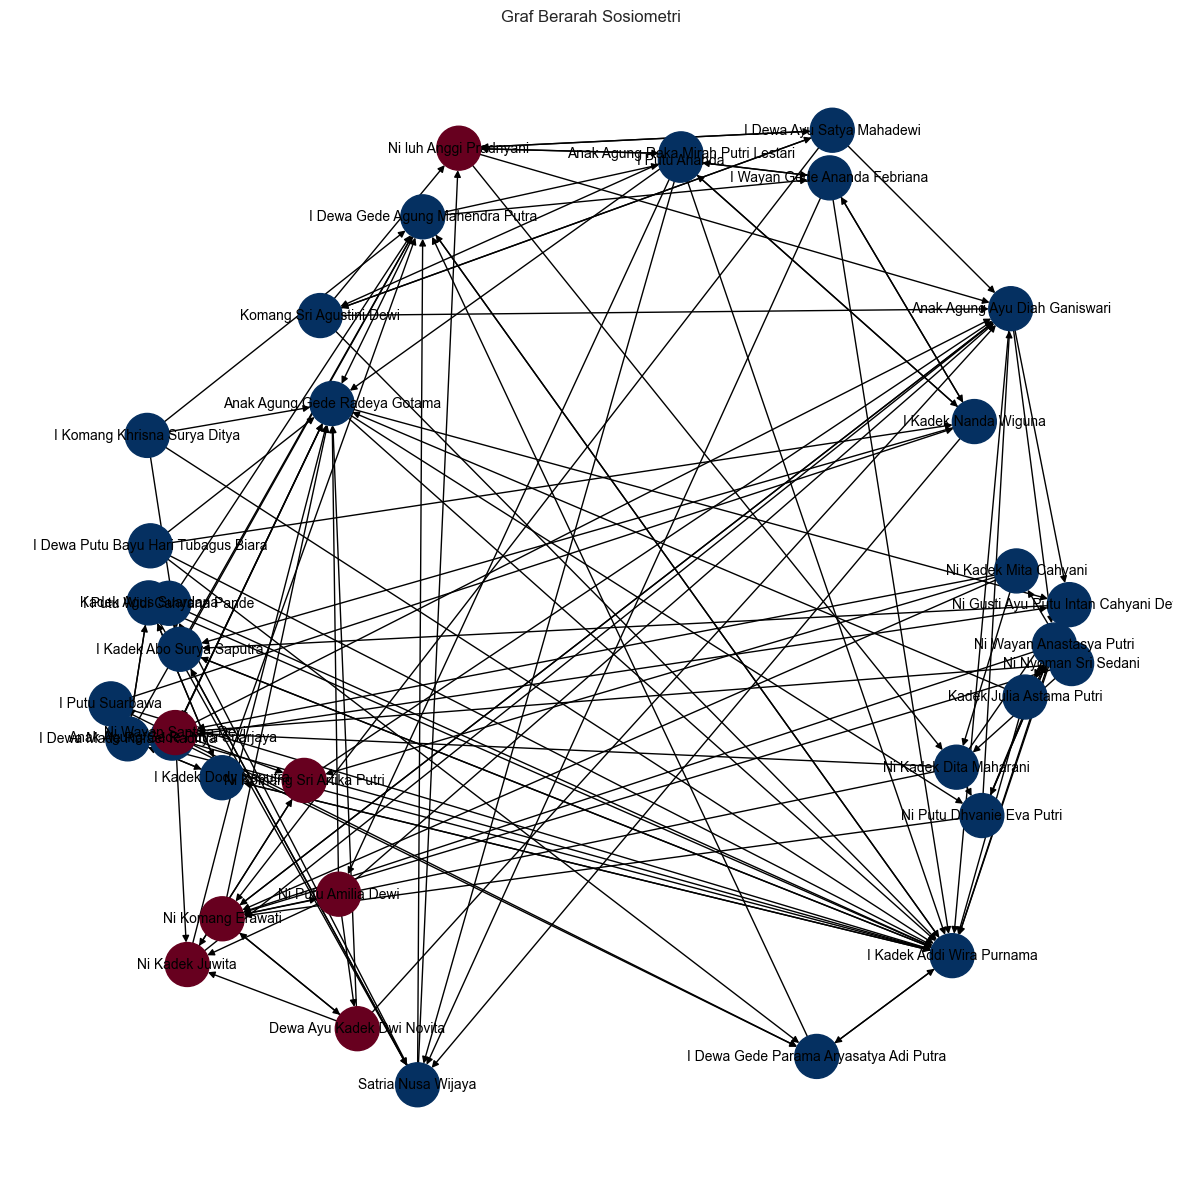

CPU times: user 4.5 s, sys: 352 ms, total: 4.85 s
Wall time: 8.99 s


In [21]:
%%time
# Visualisasi graf berarah

# Buat figure dan axis
fig, ax = plt.subplots(figsize=(15, 15))

# Pilih warna berdasarkan kluster
colors = [node[1]['cluster'] for node in G.nodes(data=True)]

# Gambar graf pada axis yang diberikan
pos = nx.spring_layout(G)  # Kita bisa mencoba layout lain seperti: shell_layout, circular_layout, etc.
nx.draw(G, pos, ax=ax, with_labels=True, node_color=colors, cmap=plt.cm.RdBu, font_size=10, node_size=1000)

ax.set_title('Graf Berarah Sosiometri')
plt.show()

In [22]:
%%time
# Menghitung bobot untuk setiap Node

in_degrees = dict(G.in_degree(weight='weight'))
out_degrees = dict(G.out_degree(weight='weight'))


CPU times: user 416 µs, sys: 3 µs, total: 419 µs
Wall time: 433 µs


In [23]:
%%time
# Menambahkan bobot ke dataframe

df['in_degree'] = df['NAMA LENGKAP'].map(in_degrees)
df['out_degree'] = df['NAMA LENGKAP'].map(out_degrees)
df['total_degree'] = df['in_degree'] + df['out_degree']


CPU times: user 12 ms, sys: 6.33 ms, total: 18.3 ms
Wall time: 27.5 ms


In [24]:
%%time
# Analisis bobot

most_mentioned = df.sort_values(by='total_degree', ascending=False).head()
print("Siswa yang Paling Sering Disebutkan:")
print(most_mentioned)

least_mentioned = df.sort_values(by='total_degree').head()
print("\nSiswa yang Paling Jarang Disebutkan:")
print(least_mentioned)


Siswa yang Paling Sering Disebutkan:
             Timestamp                   Email Address  \
22    5/7/2023 9:14:32    intancahyani090909@gmail.com   
32    5/7/2023 9:01:22            wayannana9@gmail.com   
12  6/23/2023 19:43:04  nikomangsulastriasih@gmail.com   
27  5/13/2023 19:28:57        komangputri830@gmail.com   
24  5/26/2023 18:04:09        nikadekjuwita0@gmail.com   

                            NAMA LENGKAP  NO ABSEN KELAS  \
22  Ni Gusti Ayu Putu Intan Cahyani Dewi        23  VIIH   
32              Ni Wayan Anastasya Putri        33  VIIH   
12                  I Kadek Dody Saputra        13  VIIG   
27            Ni Komang Sri Artika Putri        28  VIIH   
24                       Ni Kadek Juwita        25  VIIH   

   1. Teman anda yang paling anda sukai di kelas  \
22                      Ni Wayan Anastasya Putri   
32                     Ni Putu Dhvanie Eva Putri   
12                    I Dewa Made Rafael Raditya   
27                               Ni Kadek Juw

/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/macbook/Library/Caches/pypoetry/virtualenvs/sociometryclustering-JcDGiAFq-py3.10/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:763: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(marker_size) / 2


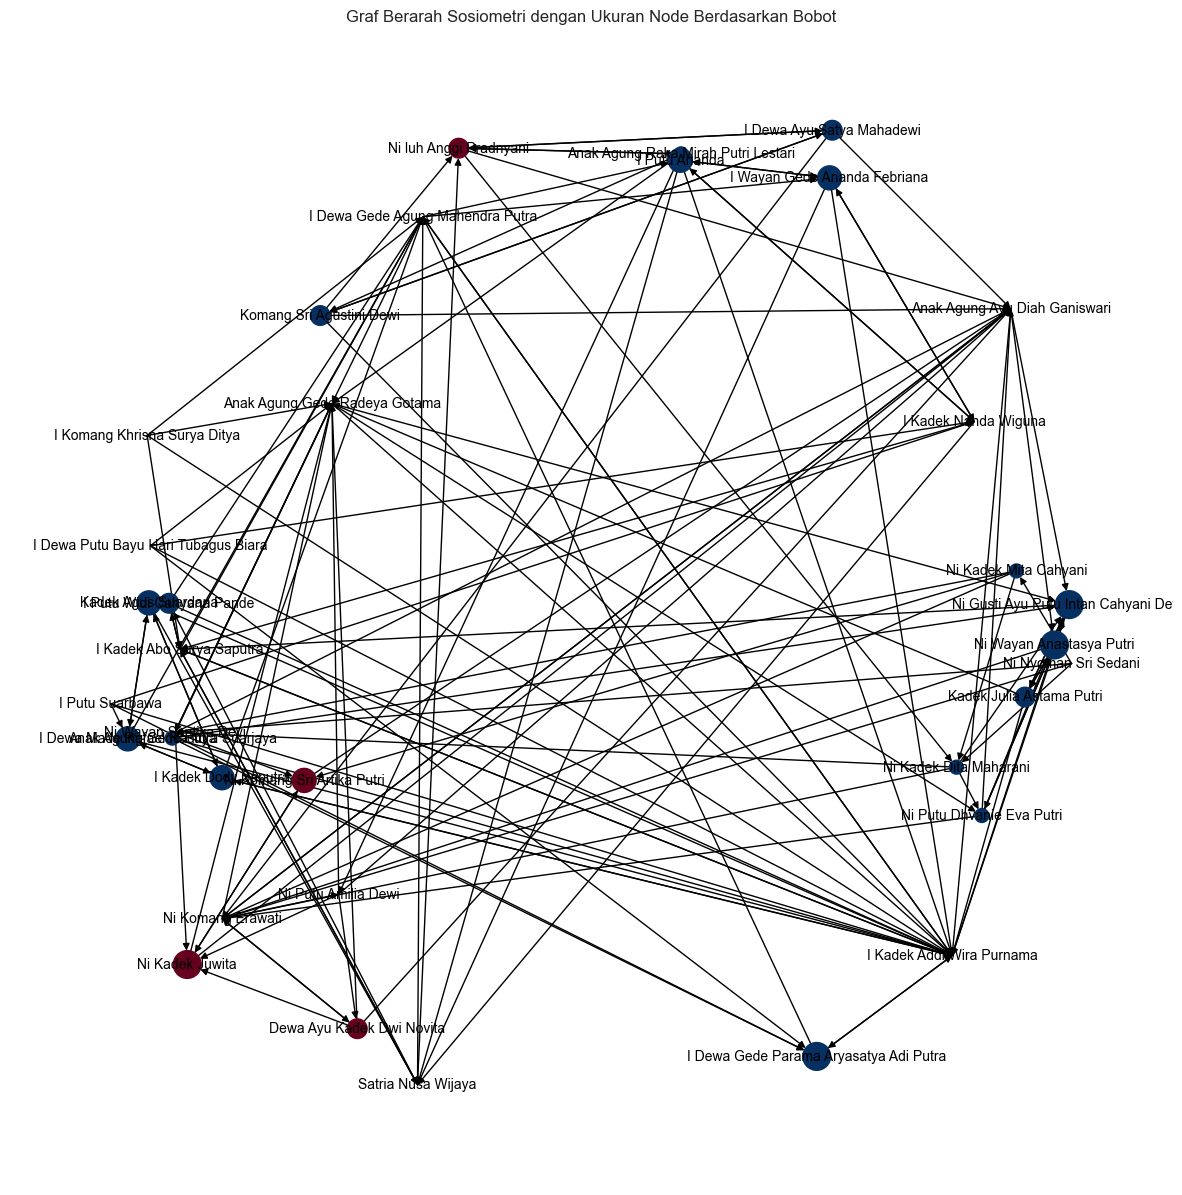

CPU times: user 3.8 s, sys: 245 ms, total: 4.05 s
Wall time: 6.94 s


In [25]:
%%time
# Visualisasi bobot

node_sizes = [in_degrees[node] * 100 for node in G.nodes()]

fig, ax = plt.subplots(figsize=(15, 15))
node_sizes = [in_degrees[node] * 100 for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=node_sizes, cmap=plt.cm.RdBu, font_size=10, ax=ax)
ax.set_title('Graf Berarah Sosiometri dengan Ukuran Node Berdasarkan Bobot')
plt.show()


In [26]:
%%time
# Implimentasi Algoritma Welch-Powell

def welch_powell(graph):
    color_map = {}
    colors = []

    # Urutkan simpul berdasarkan derajatnya
    nodes_sorted_by_degree = sorted(list(graph.nodes()), key=lambda x: len(list(graph.neighbors(x))), reverse=True)

    for node in nodes_sorted_by_degree:
        available_colors = [True] * len(graph)

        for neighbor in graph.neighbors(node):
            if neighbor in color_map:
                color = color_map[neighbor]
                available_colors[color] = False

        for color, available in enumerate(available_colors):
            if available:
                color_map[node] = color
                if color not in colors:
                    colors.append(color)
                break

    return color_map, len(colors)


CPU times: user 11 µs, sys: 2 µs, total: 13 µs
Wall time: 21 µs


In [27]:
%%time
# Menerapkan pewarnaan pada graf

color_map, num_colors = welch_powell(G)
colors = [color_map[node] for node in G.nodes()]


CPU times: user 329 µs, sys: 3 µs, total: 332 µs
Wall time: 344 µs


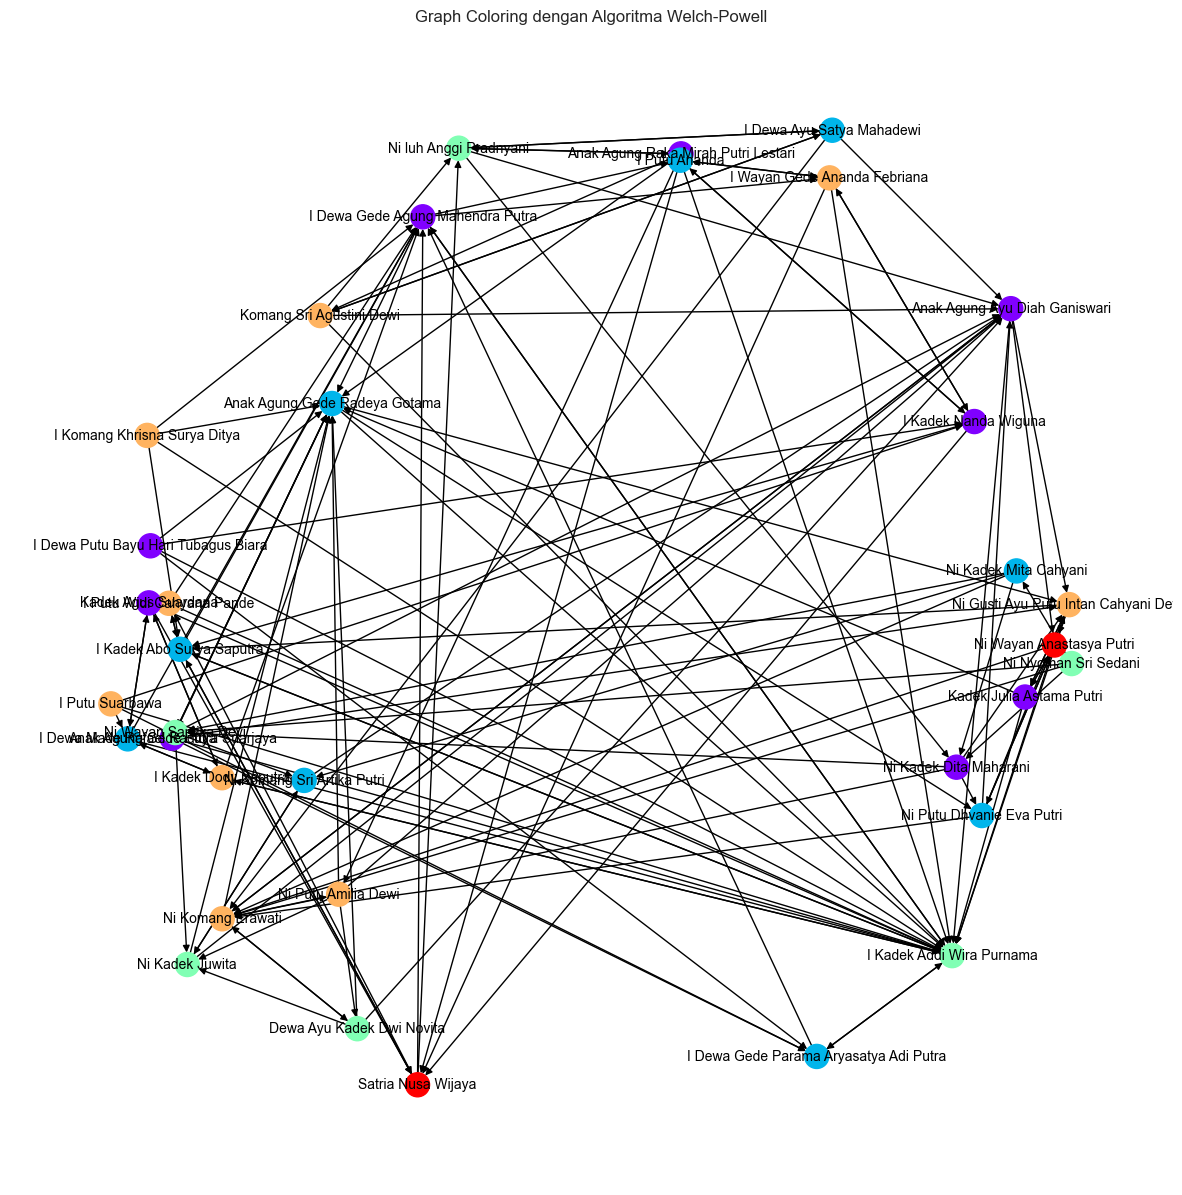

CPU times: user 4.4 s, sys: 318 ms, total: 4.72 s
Wall time: 7.9 s


In [28]:
%%time
# Visualisasi graf dengan pewarnaan

fig, ax = plt.subplots(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, node_color=colors, cmap=plt.cm.rainbow, font_size=10, ax=ax)
ax.set_title('Graph Coloring dengan Algoritma Welch-Powell')
plt.show()


IndexError: list index out of range

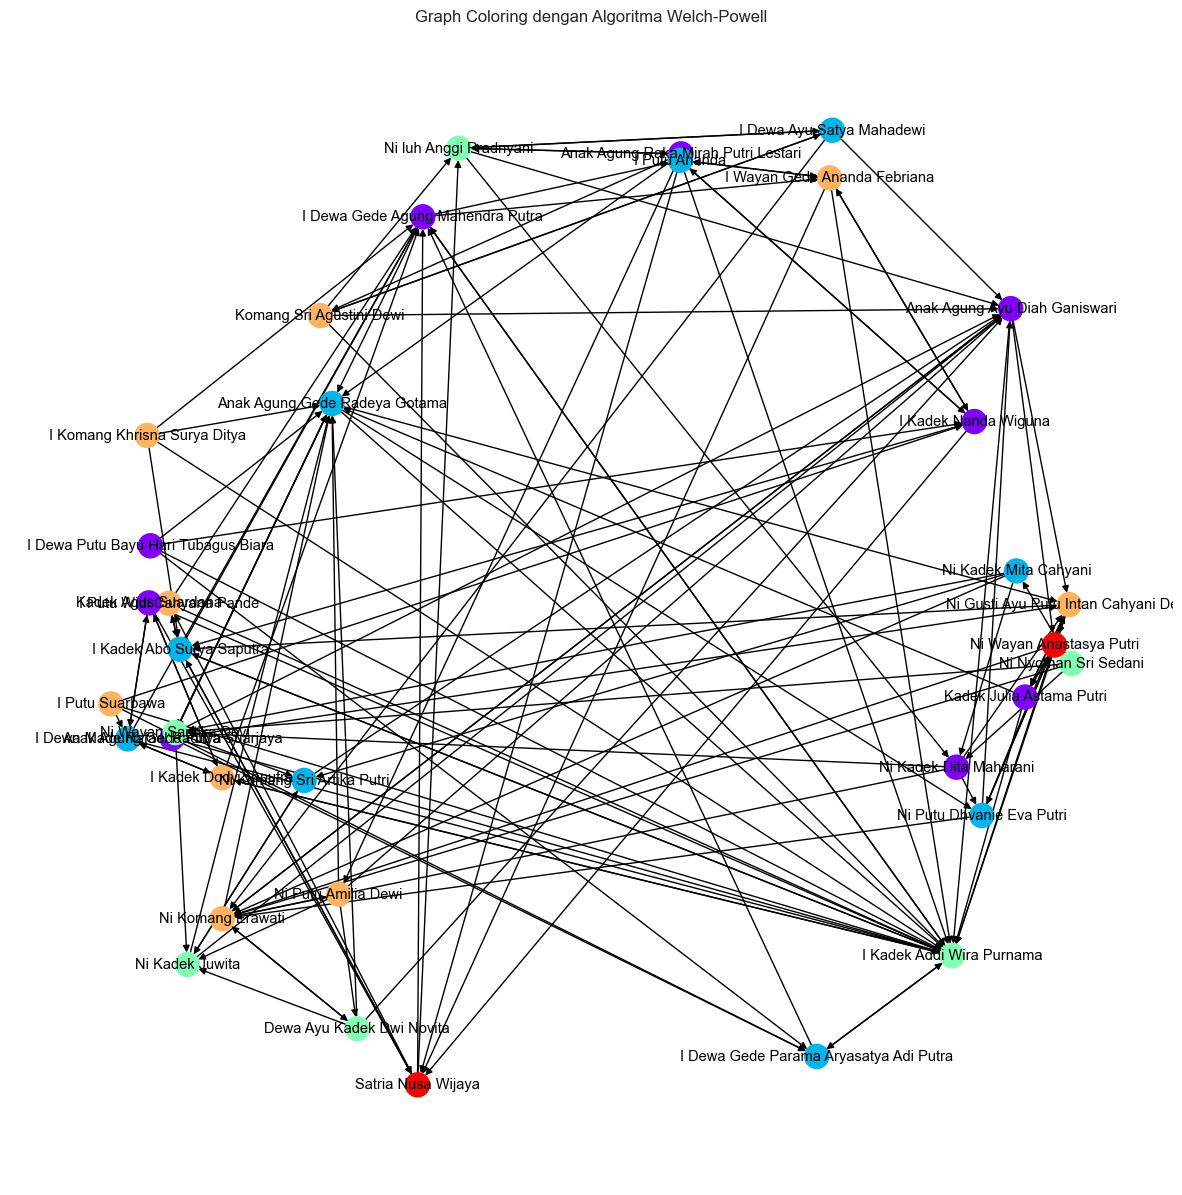

In [29]:
%%time
cmap = plt.cm.rainbow
norm = plt.Normalize(0, num_colors-1)

normalized_colors = [cmap(norm(color)) for color in colors]

fig, ax = plt.subplots(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, node_color=colors, cmap=cmap, font_size=10.5, ax=ax)
ax.set_title('Graph Coloring dengan Algoritma Welch-Powell')

# Membuat legenda berdasarkan pewarnaan yang unik dan mapping warnanya
custom_labels = ["Disukai A", "Disukai B", "Tidak A", "Tidak B"]
legend_labels = {color: f'Cluster {color+1}' for color in set(colors)}
# handles = [Patch(color=cmap(norm(color)), label=label) for color, label in legend_labels.items()]

# Membuat legenda berdasarkan pewarnaan yang unik
unique_colors = list(set(colors))
handles = [Patch(color=cmap(norm(color)), label=custom_labels[color]) for color in unique_colors]

ax.legend(handles=handles, title='Clusters')
plt.show()


IndexError: list index out of range

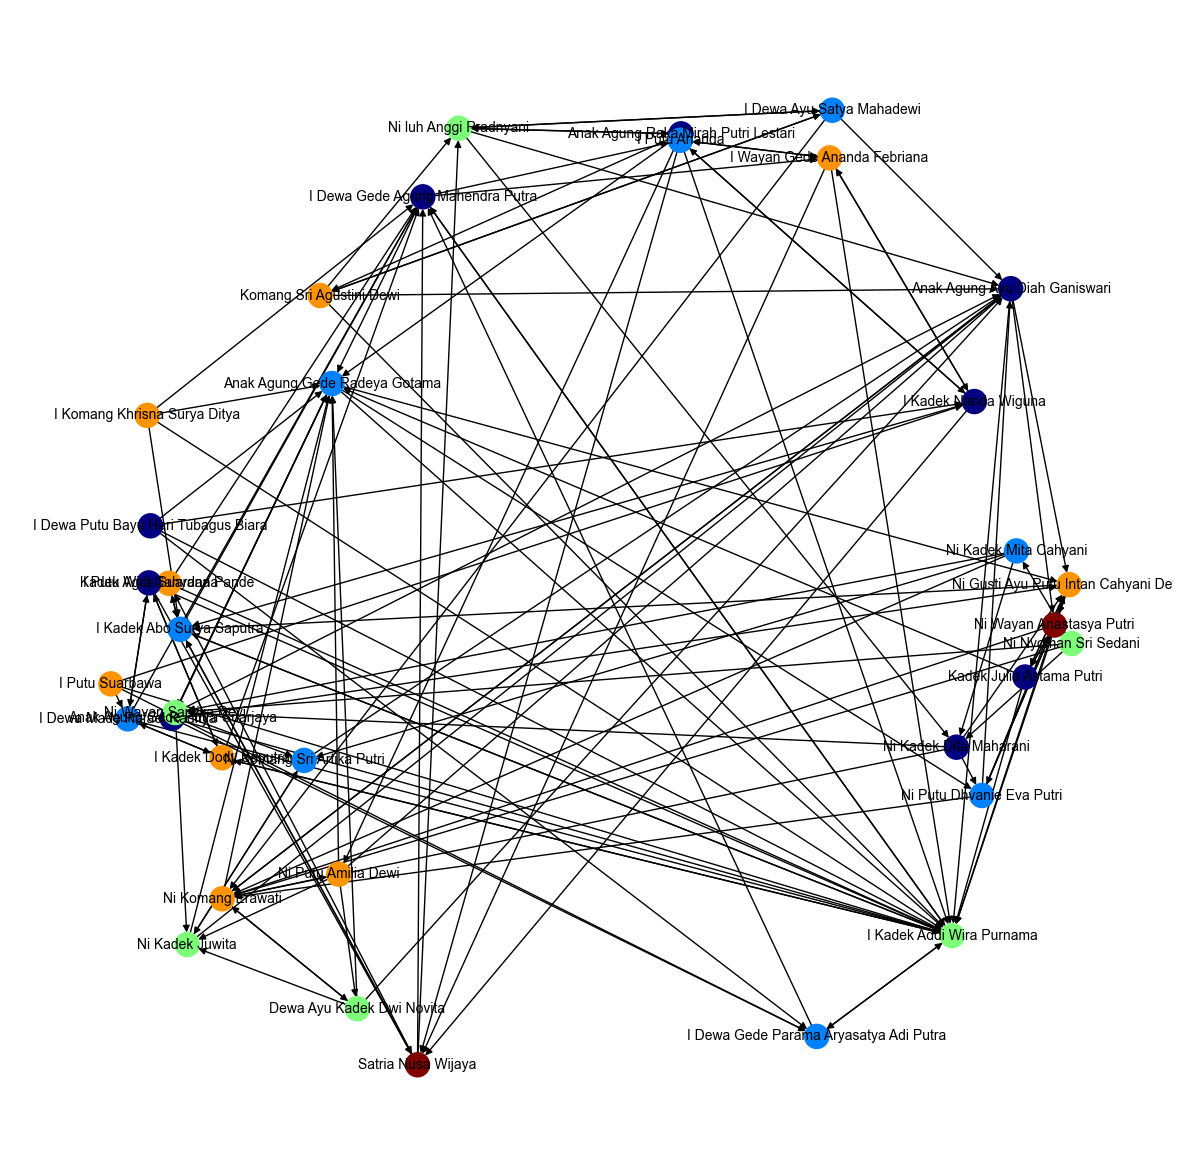

In [30]:
%%time
# Ubah nilai numerik colors menjadi warna
cmap = plt.cm.jet  # Kita bisa mengganti jet dengan colormap lainnya yang Kita suka
max_value = max(colors)
min_value = min(colors)
norm = plt.Normalize(min_value, max_value)
mapped_colors = [cmap(norm(value)) for value in colors]

fig, ax = plt.subplots(figsize=(15, 15))

# Gambar graf dengan warna yang sudah di-mapped
nx.draw(G, pos, with_labels=True, node_color=mapped_colors, font_size=10, ax=ax)

# Buat legenda yang dinamis
unique_colors = list(set(mapped_colors))
handles = [plt.Line2D([0],
                      [0],
                      marker='o',
                      color='w',
                      label=custom_labels[color_group],
                      markersize=10,
                      markerfacecolor=color) for color_group, color in zip(set(colors),
                                                                           unique_colors)]

ax.legend(handles=handles, title="Clusters")

plt.show()

In [31]:
file_path = "./sociometryclustering/Processed Data H.csv"
df = pd.read_csv(file_path)
df

,Timestamp,Email Address,NAMA LENGKAP,NO ABSEN,KELAS,1. Teman anda yang paling anda sukai di kelas,Alasan,2. Teman anda yang paling anda sukai di kelas,ALASAN,1. Teman anda yang paling anda tidak sukai di kelas,ALASAN.1,2. Teman anda yang paling anda tidak sukai di kelas,ALASAN.2
0,5/6/2023 22:35:14,gungdiahganis@gmail.com,Anak Agung Ayu Diah Ganiswari,1,VIIH,Ni Gusti Ayu Putu Intan Cahyani Dewi,"baik , dmn ngai kedek kanti sakit basang",Ni Wayan Anastasya Putri,baik,I Kadek Addi Wira Purnama,"caper , pick me",Ni Komang Erawati,"caper , sg bisa nenggil"
1,5/8/2023 20:07:49,putrasuarjaya148@gmail.com,Anak Agung Gede Putra Suarjaya,2,VIIH,I Dewa Gede Parama Aryasatya Adi Putra,karena dia asik,Anak Agung Gede Radeya Gotama,orang nya asik,I Kadek Addi Wira Purnama,Karna dia kalau Kita ejek ngak boleh kalau dia...,Ni Gusti Ayu Putu Intan Cahyani Dewi,sok asikk
2,5/8/2023 20:05:13,gungradea123@gmail.com,Anak Agung Gede Radeya Gotama,3,VIIH,Ni Gusti Ayu Putu Intan Cahyani Dewi,Karena dia asik diajak bercanda atau bermain,Anak Agung Gede Putra Suarjaya,Karena dia polos dan polos,I Kadek Addi Wira Purnama,Karena dia sok asik dan diya sering minta toh ...,Ni Putu Dhvanie Eva Putri,Karna dia sombong dan sok akrab
3,5/17/2023 9:04:53,pgung567@gmail.com,Anak Agung Raka Mirah Putri Lestari,4,VIIH,Ni luh Anggi Pradnyani,Baik,Komang Sri Agustini Dewi,Baik hati,Anak Agung Gede Radeya Gotama,Mengejek nama ortu,Ni Putu Amilia Dewi,Karena dia sombong
4,5/8/2023 21:45:36,dewaayudwi4@gmail.com,Dewa Ayu Kadek Dwi Novita,5,VIIH,Ni Komang Erawati,Karna asik,Ni Kadek Juwita,Karena baik,Anak Agung Ayu Diah Ganiswari,Karena sinis,Anak Agung Gede Radeya Gotama,Karena suka mengejek
5,5/7/2023 7:36:55,yuxxclarasatya@gmail.com,I Dewa Ayu Satya Mahadewi,6,VIIH,Komang Sri Agustini Dewi,Karna dia baik dan selalu membantu sy dalam pe...,Ni luh Anggi Pradnyani,"Karna dia baik, dan bisa bikin saya selalu ket...",Ni Komang Erawati,"Karna dia selalu teriak' di kelas, dia selalu ...",Anak Agung Ayu Diah Ganiswari,Karna dia suka nyindir' saya\n
6,6/23/2023 19:37:45,nikomangsulastriasih@gmail.com,I Dewa Gede Agung Mahendra Putra,7,VIIH,I Wayan Gede Ananda Febriana,karena baik,I Putu Ananda,karena baik,Anak Agung Gede Radeya Gotama,membully nama ortu,I Kadek Addi Wira Purnama,karna dia nakal
7,5/19/2023 18:33:52,rmz163005@gmail.com,I Dewa Gede Parama Aryasatya Adi Putra,8,VIIH,I Kadek Addi Wira Purnama,Baperan(dia ngejek tapi gamau di ejek),I Dewa Gede Agung Mahendra Putra,Gak asik,I Kadek Addi Wira Purnama,"Sok asik,baperan,ga mau diejek tapi dia ngejek",I Dewa Gede Agung Mahendra Putra,"Sok asik,baperan"
8,5/8/2023 20:49:17,dewarafael104@gmail.com,I Dewa Made Rafael Raditya,9,VIIH,I Kadek Dody Saputra,Tidak sombong,Kadek Agus Suardana,Sopan,I Dewa Gede Agung Mahendra Putra,Sombong,I Kadek Addi Wira Purnama,Suka mengejek nama ortu
9,5/8/2023 19:59:39,dewabayu086@gmail.com,I Dewa Putu Bayu Hari Tubagus Biara,10,VIIH,Anak Agung Gede Radeya Gotama,Karena asik diajak bercanda,I Dewa Gede Parama Aryasatya Adi Putra,Karena asik untuk diajak bercanda,I Kadek Addi Wira Purnama,Karena dia hanya ingin kemauannya dituruti,I Kadek Nanda Wiguna,Karena dia sombong


In [32]:
# Gabungkan kolom teman yang disukai dan tidak disukai menjadi satu DataFrame baru
df_teman_sukai = pd.concat([df['1. Teman anda yang paling anda sukai di kelas'], df['2. Teman anda yang paling anda sukai di kelas']],ignore_index=True).dropna()

df_teman_tidak_sukai = pd.concat([df['1. Teman anda yang paling anda tidak sukai di kelas'], df['2. Teman anda yang paling anda tidak sukai di kelas']],ignore_index=True).dropna()

# Bersihkan dan normalisasi data
df_teman_y = df_teman_sukai.str.strip()
df_teman_x = df_teman_tidak_sukai.str.strip()

# Ganti NaN dengan string kosong ('') sebelum menghitung frekuensi
df_teman_y = df_teman_y.fillna('')
df_teman_x = df_teman_x.fillna('')

# Hitung frekuensi kemunculan teman yang disukai dan tidak disukai
frekuensi_disukai = df_teman_y.value_counts().astype(float)
frekuensi_tidak_disukai = df_teman_x.value_counts().astype(float)

# Buat DataFrame kesimpulan
df_kesimpulan = pd.merge(pd.DataFrame({'Nama siswa/i yang disukai': frekuensi_disukai.index,
                                       'Frekuensi disukai': frekuensi_disukai.values}),
                         pd.DataFrame({'Nama siswa/i yang tidak disukai': frekuensi_tidak_disukai.index,
                                       'Frekuensi tidak disukai': frekuensi_tidak_disukai.values}),
                         how='outer',
                         left_index=True,
                         right_index=True)

# Tampilkan DataFrame kesimpulan
df_kesimpulan

,Nama siswa/i yang disukai,Frekuensi disukai,Nama siswa/i yang tidak disukai,Frekuensi tidak disukai
0,Ni Gusti Ayu Putu Intan Cahyani Dewi,5.0,I Kadek Addi Wira Purnama,19.0
1,Ni Kadek Juwita,5.0,Anak Agung Ayu Diah Ganiswari,11.0
2,I Dewa Gede Parama Aryasatya Adi Putra,4.0,Anak Agung Gede Radeya Gotama,8.0
3,Ni Komang Sri Artika Putri,4.0,I Dewa Gede Agung Mahendra Putra,8.0
4,Ni Wayan Anastasya Putri,4.0,Ni Komang Erawati,7.0
5,I Wayan Gede Ananda Febriana,3.0,Satria Nusa Wijaya,4.0
6,I Kadek Dody Saputra,3.0,I Kadek Abo Surya Saputra,3.0
7,Anak Agung Gede Radeya Gotama,3.0,Ni Wayan Santika Devi,3.0
8,I Dewa Made Rafael Raditya,3.0,I Kadek Nanda Wiguna,2.0
9,I Kadek Abo Surya Saputra,3.0,Ni Gusti Ayu Putu Intan Cahyani Dewi,1.0
